In [44]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import pandas as pd
import numpy as np 
import ast

# Loading Data the Locational Data

In [2]:
locational_data = pd.read_csv('../3.Prepared Data/locational_data.csv')
locational_data.head(1)

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,...,username,followers,following,caption_emotions,most_powerful_emotion,emotion_score,engagement_rate(%),hashtag,date,time
0,40506412,christinehmcconnell,CzJtDjegmdI,False,Had an amazing time in #salem for Halloween th...,466,79000,1.698945e+09,salem-massachusetts,https://instagram.ffor43-1.fna.fbcdn.net/v/t39...,...,christinehmcconnell,597189.0,1576.0,"{'neg': 0.020397255, 'neu': 0.08311723, 'pos':...",pos,0.896486,13.306675,"['salem', 'halloween', 'salemjack']",2023-11-02,17:13:26


In [3]:
non_locational_data = pd.read_csv('../3.Prepared Data/non_locational_data.csv')
non_locational_data.head(1)

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,imageUrl,multiple_images,username,followers,following,caption_emotions,most_powerful_emotion,emotion_score,engagement_rate(%),hashtag,date,time
0,36063641,christendominique,C3_GS1ASeWI,False,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,1.709327e+09,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,christendominique,2144626.0,1021.0,"{'neg': 0.034616627, 'neu': 0.6108251, 'pos': ...",neu,0.610825,0.776359,[],2024-03-01,20:59:18


# Handlings Duplicates

In [4]:
non_locational_data.drop_duplicates(inplace=True)
locational_data.drop_duplicates(inplace=True)

# looking at DataTypes 

In [5]:
locational_data.shape

(2784, 21)

In [6]:
non_locational_data.shape

(6844, 20)

In [7]:
# print(locational_data.info())
print(non_locational_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6844 entries, 0 to 6843
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   owner_id               6844 non-null   int64  
 1   owner_username         6844 non-null   object 
 2   shortcode              6844 non-null   object 
 3   is_video               6844 non-null   bool   
 4   caption                6844 non-null   object 
 5   comments               6844 non-null   int64  
 6   likes                  6844 non-null   int64  
 7   created_at             6844 non-null   float64
 8   imageUrl               6844 non-null   object 
 9   multiple_images        6844 non-null   bool   
 10  username               6844 non-null   object 
 11  followers              6844 non-null   float64
 12  following              6844 non-null   float64
 13  caption_emotions       6844 non-null   object 
 14  most_powerful_emotion  6844 non-null   object 
 15  emot

In [8]:
non_locational_data["date"] = pd.to_datetime(non_locational_data.date)

Looking good. This data is already clean, so I'll proceed with visualization straight away.

---------------



# Analysis Based on User

in this part i will look at activities of one of most active account is this dataset. to find most active account:

In [9]:
non_locational_data.groupby(by="owner_username").agg({"caption" : "count"}).sort_values(by="caption" ,ascending=False).head(3)

,caption
owner_username,
mensfashions,37
enjoyphoenix,24
emilyskyefit,22


most active account in this dataset is account with username `mensfashions`. as you see there are over 30 posts of this account in this dataset; so by looking at activities of this account we can predict next activities of this account.

this account is a perfect account for this objective, it has high number of followers (around `1.9 M`) and following a low number of following (just `11 accounts`)

In [10]:
mensfashions = non_locational_data.loc[non_locational_data["owner_username"] == "mensfashions"]
mensfashions.head(3)

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,imageUrl,multiple_images,username,followers,following,caption_emotions,most_powerful_emotion,emotion_score,engagement_rate(%),hashtag,date,time
1381,184378318,mensfashions,C3U-uVbt0SL,False,Suit up Inspo 🔥 by @artworth_brothers,5,2307,1.707914e+09,https://instagram.flhr13-1.fna.fbcdn.net/v/t51...,True,mensfashions,1957620.0,11.0,"{'neg': 0.034818787, 'neu': 0.32848975, 'pos':...",pos,0.636691,0.118103,[],2024-02-14,12:25:03
1382,184378318,mensfashions,C3IhWn1t_mM,True,Channeling the inner dad ☕️,14,2507,1.707495e+09,https://instagram.flhr13-1.fna.fbcdn.net/v/t51...,False,mensfashions,1957620.0,11.0,"{'neg': 0.046530932, 'neu': 0.50175273, 'pos':...",neu,0.501753,0.128779,[],2024-02-09,16:18:19
1383,184378318,mensfashions,C3FVQcZNPFe,False,Italian style inspiration 🇮🇹,5,1566,1.707388e+09,https://instagram.flhr13-1.fna.fbcdn.net/v/t51...,True,mensfashions,1957620.0,11.0,"{'neg': 0.03071826, 'neu': 0.14121525, 'pos': ...",pos,0.828066,0.080251,[],2024-02-08,10:34:06


In [11]:
mensfashions.loc[mensfashions["likes"] > 5000]

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,imageUrl,multiple_images,username,followers,following,caption_emotions,most_powerful_emotion,emotion_score,engagement_rate(%),hashtag,date,time
3040,184378318,mensfashions,Cnziriku8ve,True,Unboxing the NEW Jeep Wagoneer!🎁\nDo you like ...,125,11651,1.674579e+09,https://scontent-lhr6-2.cdninstagram.com/v/t51...,False,mensfashions,1957620.0,11.0,"{'neg': 0.039306264, 'neu': 0.5155821, 'pos': ...",neu,0.515582,0.601547,[],2023-01-24,16:57:01
4897,184378318,mensfashions,CxeC1RDNoX_,True,Via: @luxurylifestylemagazine That’s one way t...,188,6343,1.695333e+09,https://instagram.fkul3-3.fna.fbcdn.net/v/t51....,False,mensfashions,1957620.0,11.0,"{'neg': 0.053318985, 'neu': 0.4320326, 'pos': ...",pos,0.514648,0.333619,[],2023-09-21,21:47:28


In [12]:
list(mensfashions.loc[mensfashions["shortcode"] == "CxeC1RDNoX_"]["caption"])

['Via: @luxurylifestylemagazine That’s one way to get into a Lamborghini Urus 🔥\n\nBy @darya_antukhevich @vasia_lavr']

In [13]:
mensfashions

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,imageUrl,multiple_images,username,followers,following,caption_emotions,most_powerful_emotion,emotion_score,engagement_rate(%),hashtag,date,time
1381,184378318,mensfashions,C3U-uVbt0SL,False,Suit up Inspo 🔥 by @artworth_brothers,5,2307,1.707914e+09,https://instagram.flhr13-1.fna.fbcdn.net/v/t51...,True,mensfashions,1957620.0,11.0,"{'neg': 0.034818787, 'neu': 0.32848975, 'pos':...",pos,0.636691,0.118103,[],2024-02-14,12:25:03
1382,184378318,mensfashions,C3IhWn1t_mM,True,Channeling the inner dad ☕️,14,2507,1.707495e+09,https://instagram.flhr13-1.fna.fbcdn.net/v/t51...,False,mensfashions,1957620.0,11.0,"{'neg': 0.046530932, 'neu': 0.50175273, 'pos':...",neu,0.501753,0.128779,[],2024-02-09,16:18:19
1383,184378318,mensfashions,C3FVQcZNPFe,False,Italian style inspiration 🇮🇹,5,1566,1.707388e+09,https://instagram.flhr13-1.fna.fbcdn.net/v/t51...,True,mensfashions,1957620.0,11.0,"{'neg': 0.03071826, 'neu': 0.14121525, 'pos': ...",pos,0.828066,0.080251,[],2024-02-08,10:34:06
1384,184378318,mensfashions,C2kJ1wEN3Sr,False,Couple style inspo 🔥,5,1335,1.706275e+09,https://instagram.flhr13-1.fna.fbcdn.net/v/t51...,True,mensfashions,1957620.0,11.0,"{'neg': 0.034413874, 'neu': 0.18799922, 'pos':...",pos,0.777587,0.068450,[],2024-01-26,13:19:24
1385,184378318,mensfashions,C2cBBtSNaJZ,True,What do you think? ☕️,11,775,1.706002e+09,https://instagram.flhr13-1.fna.fbcdn.net/v/t51...,False,mensfashions,1957620.0,11.0,"{'neg': 0.05096013, 'neu': 0.72231996, 'pos': ...",neu,0.722320,0.040151,[],2024-01-23,09:31:26
1386,184378318,mensfashions,C2ZKdqONlAy,False,Cold Season Pitti Inspiration 🔥\n@anthony.knaape,16,1805,1.705906e+09,https://instagram.flhr13-1.fna.fbcdn.net/v/t51...,True,mensfashions,1957620.0,11.0,"{'neg': 0.08840563, 'neu': 0.26678282, 'pos': ...",pos,0.644811,0.093021,[],2024-01-22,06:53:12
1387,184378318,mensfashions,C0tHo6btnfo,False,Stylish Duos 🔥,8,1926,1.702281e+09,https://instagram.flhr13-1.fna.fbcdn.net/v/t51...,True,mensfashions,1957620.0,11.0,"{'neg': 0.025578734, 'neu': 0.11567437, 'pos':...",pos,0.858747,0.098793,[],2023-12-11,07:50:32
3017,184378318,mensfashions,C3U-uVbt0SL,False,Suit up Inspo 🔥 by @artworth_brothers,5,2317,1.707914e+09,https://instagram.fcgb11-1.fna.fbcdn.net/v/t51...,True,mensfashions,1957620.0,11.0,"{'neg': 0.034818787, 'neu': 0.32848975, 'pos':...",pos,0.636691,0.118613,[],2024-02-14,12:25:03
3018,184378318,mensfashions,C3Pk-_JtNiW,True,Black or cream - Vote on your choice 🙌🏽,11,566,1.707732e+09,https://instagram.fcgb11-1.fna.fbcdn.net/v/t51...,False,mensfashions,1957620.0,11.0,"{'neg': 0.06597123, 'neu': 0.45402995, 'pos': ...",pos,0.479999,0.029475,[],2024-02-12,10:04:39
3019,184378318,mensfashions,C3IhWn1t_mM,True,Channeling the inner dad ☕️,14,2515,1.707495e+09,https://instagram.fcgb11-1.fna.fbcdn.net/v/t51...,False,mensfashions,1957620.0,11.0,"{'neg': 0.046530932, 'neu': 0.50175273, 'pos':...",neu,0.501753,0.129187,[],2024-02-09,16:18:19


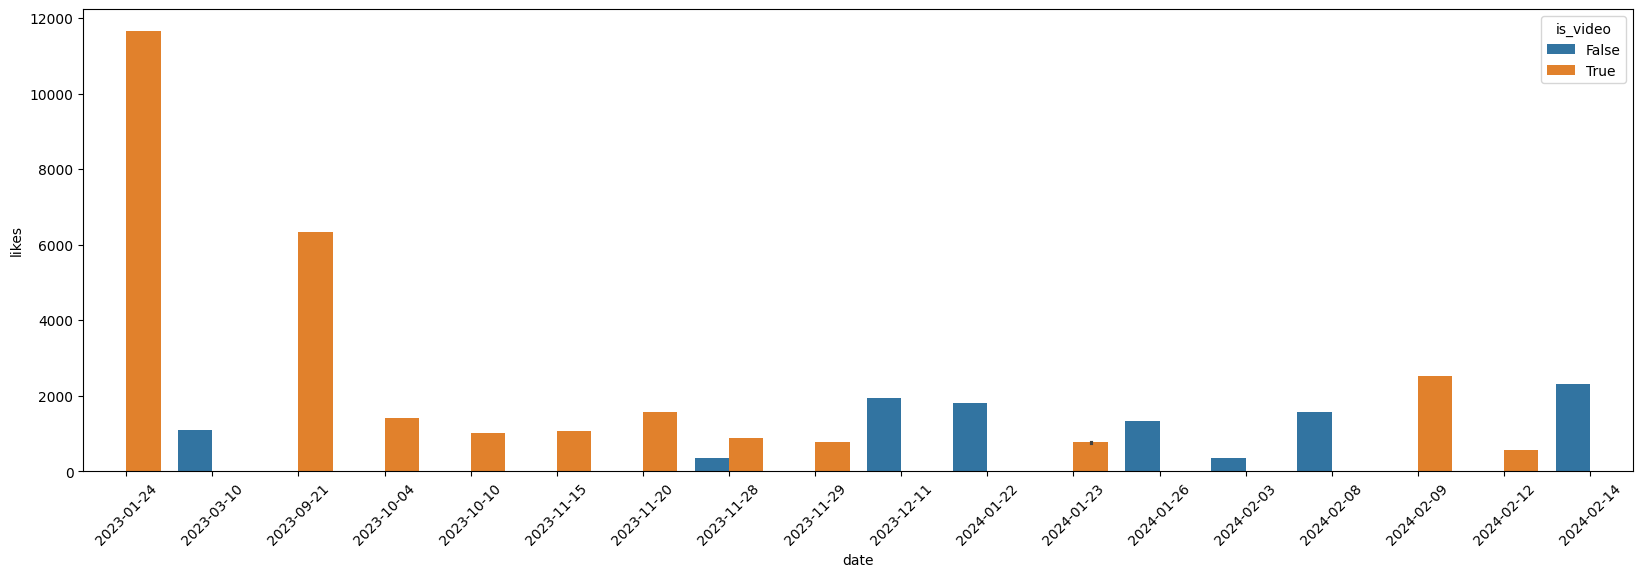

In [14]:
plt.figure(figsize=(20, 6))

ax = sns.barplot(data=mensfashions.sort_values(by="created_at", ascending=True),
            x="date",
            y="likes", 
            hue="is_video")


plt.xticks(rotation=45)
plt.show()

as you can see the most like content of this account are videos. 
1. what are these posts about?
2. what time of they these posts are committed? is there any difference between time of upload of these posts and other posts?
3. what are emotions of these posts and what are comments of these posts?


------------

# Based on Hashtags

## most used hashtags Based on time and location

selecting hashtags based on number of likes and comments and locations and emotions 

In [15]:
hashtag_intercept = dict()  # Initialize once, outside the loop

for index in range(len(locational_data["hashtag"])):
    hashtag_list = ast.literal_eval(locational_data["hashtag"][index])

    if len(hashtag_list) > 0:
        code = locational_data["shortcode"][index]
    
        hashtag_intercept[code] = {
            "hashtag": hashtag_list,
            "likes": locational_data["likes"][index],
            "comments": locational_data["comments"][index],
            "location": locational_data["location"][index],
            "emotion": locational_data["most_powerful_emotion"][index],
            "emotion_score": locational_data["emotion_score"][index]
        }

print(hashtag_intercept)


{'CzJtDjegmdI': {'hashtag': ['salem', 'halloween', 'salemjack'], 'likes': 79000, 'comments': 466, 'location': 'salem-massachusetts', 'emotion': 'pos', 'emotion_score': 0.89648557}, 'C1ABSmGMu1d': {'hashtag': ['stopmotions', 'stopmotionslovers', 'stopmotionvideo', 'stopmotionanimation', 'roughanimator', 'aftereffects'], 'likes': 297, 'comments': 25, 'location': 'guayaquil-ecuador', 'emotion': 'pos', 'emotion_score': 0.6716712}, 'C372ffZOk1L': {'hashtag': ['stopmotion', 'stopmotionanimation'], 'likes': 1317, 'comments': 73, 'location': 'guayaquil-ecuador', 'emotion': 'neu', 'emotion_score': 0.62456393}, 'C3VT_Sos__Z': {'hashtag': ['stopmotion', 'Dragonframe', 'Procreate', 'ProcreateDreams.'], 'likes': 680, 'comments': 22, 'location': 'guayaquil-ecuador', 'emotion': 'pos', 'emotion_score': 0.65119904}, 'C0Md_EOs5Ni': {'hashtag': ['Guayaquil!', 'RoughAnimator', 'AfterEffects', 'ThinkEcuador', 'RoughAnimator', 'AfterEffects'], 'likes': 268, 'comments': 7, 'location': 'guayaquil-ecuador', 'e

### analysis of trends in a certain state/city
in this section i want to select a city and then intercept hashtags in given city and emotions behind that hashtag.
for a better analyze i will see what is name of city with most number of instagram posts

In [16]:
locational_data.groupby(by="location", as_index=False).agg({"shortcode":"count"}).sort_values(by="shortcode", ascending=False)

,location,shortcode
688,los-angeles-california,83
933,paris-france,78
762,milan-italy,67
848,new-york-new-york,31
132,berlin-germany,27
...,...,...
546,illinois,1
545,ierland,1
542,hyde-park-corner,1
540,huntington-library-botanical-gardens,1


as you see the LA has most instagram posts and it is a good case for analysis of sentimental over the time 

In [17]:
LA_post = locational_data.loc[locational_data["location"] == "los-angeles-california"]
LA_post['date'] = pd.to_datetime(LA_post['date'])
LA_post.shape

C:\Users\saeed\AppData\Local\Temp\ipykernel_9840\1021390242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LA_post['date'] = pd.to_datetime(LA_post['date'])


(83, 21)

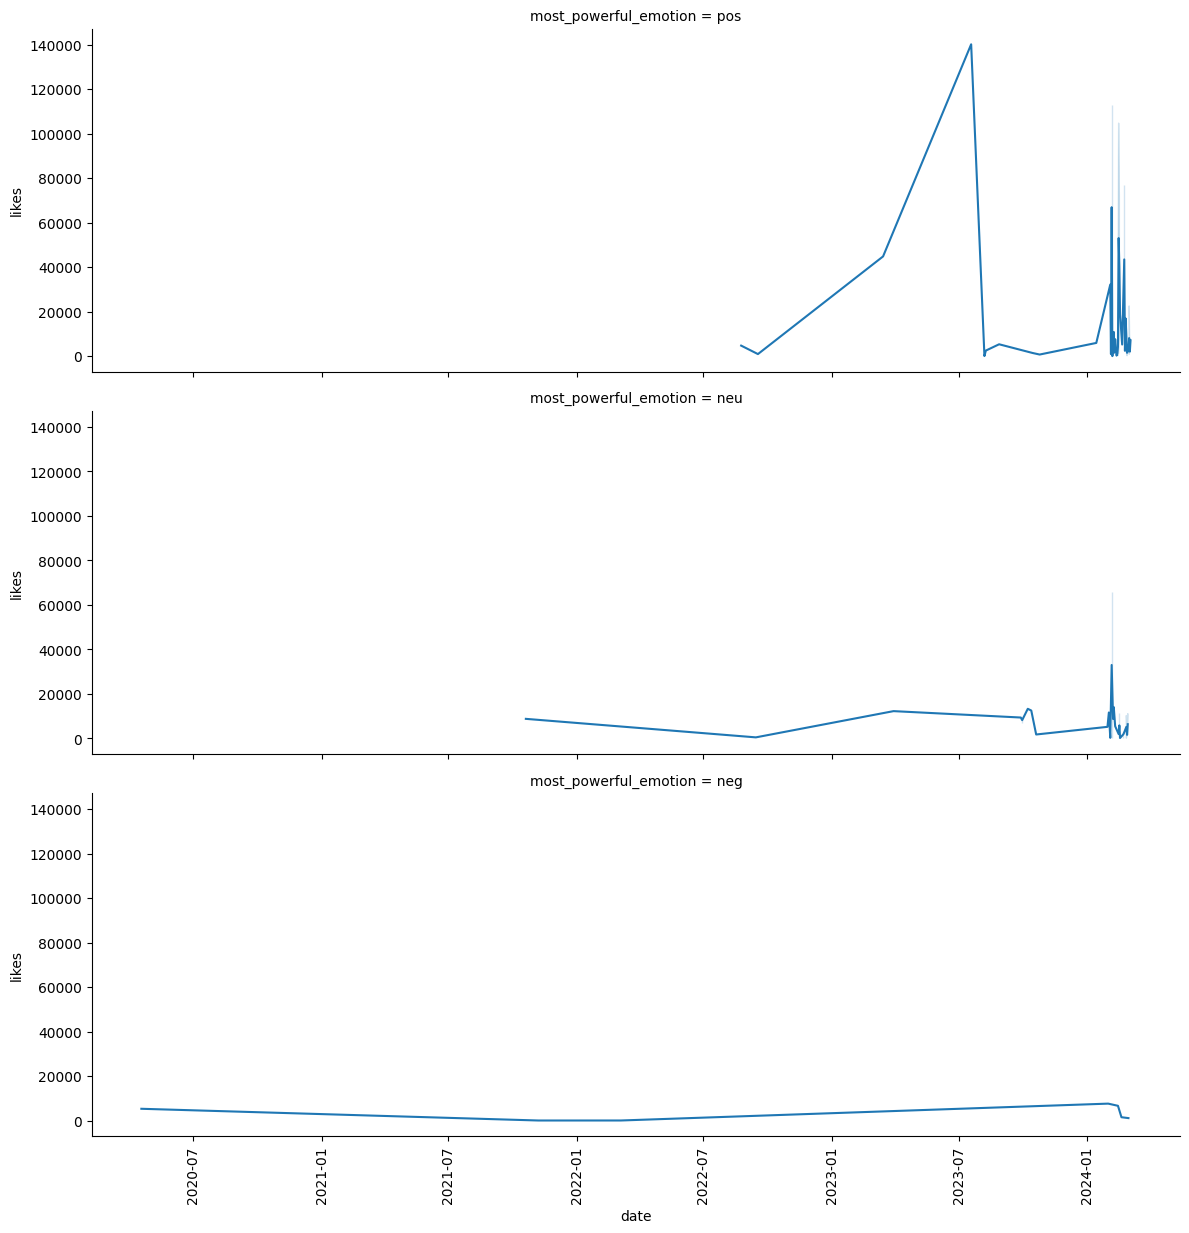

In [18]:
g = sns.FacetGrid(data=LA_post, row="most_powerful_emotion", height=4, aspect=3)
g.map(sns.lineplot, "date", "likes")
plt.xticks(rotation=90)
plt.show()

there is not enough data points in time interval 2020-07 until 2023-07. it is better to draw a chart in time interval 2023-07 to present

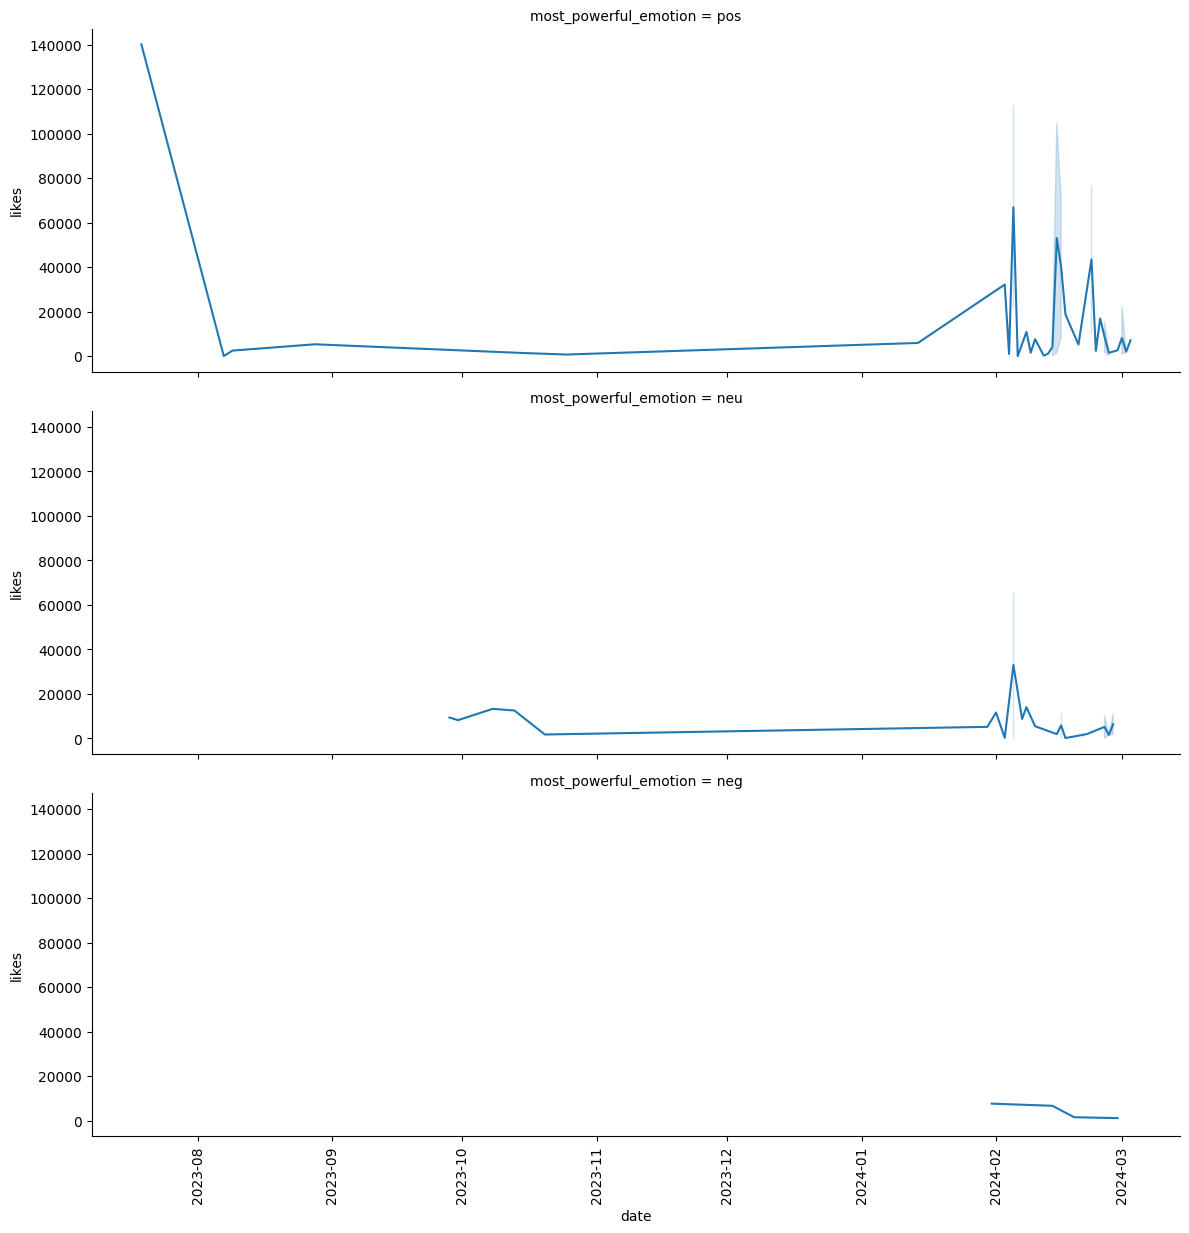

In [19]:
LA_post = LA_post.loc[LA_post['date'] >= '2023-07']
g = sns.FacetGrid(data=LA_post, row="most_powerful_emotion", height=4, aspect=3)
g.map(sns.lineplot, "date", "likes")
plt.xticks(rotation=90)
plt.show()

There is a little data with `negative emotions`, so it is possible to say our data is not mature and is not in a good condition to talk about emotions based on location.

## most used Hashtags, with out considering location

Let's look at sentiment analysis our the globe with out any considering location

In [20]:
non_locational_data['date_ordinal'] = pd.to_datetime(non_locational_data['date']).apply(lambda date: date.toordinal())

In [21]:
non_locational_data

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,imageUrl,multiple_images,...,followers,following,caption_emotions,most_powerful_emotion,emotion_score,engagement_rate(%),hashtag,date,time,date_ordinal
0,36063641,christendominique,C3_GS1ASeWI,False,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,1.709327e+09,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,...,2144626.0,1021.0,"{'neg': 0.034616627, 'neu': 0.6108251, 'pos': ...",neu,0.610825,0.776359,[],2024-03-01,20:59:18,738946
1,36063641,christendominique,C38ivgNS3IX,True,😮‍💨Brow tips I really wish I would have know w...,138,9267,1.709241e+09,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,...,2144626.0,1021.0,"{'neg': 0.17225474, 'neu': 0.5420607, 'pos': 0...",neu,0.542061,0.438538,"['browtips', 'eyebrowtutorial', 'browmakeup', ...",2024-02-29,21:10:48,738945
2,36063641,christendominique,C35-Dd9SO1b,True,OMG I can’t believe it’s already been 1 yr sin...,1089,10100,1.709155e+09,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,...,2144626.0,1021.0,"{'neg': 0.09999306, 'neu': 0.23255272, 'pos': ...",pos,0.667454,0.521723,"['sigmaxchristendominique', 'makeupforbeginner...",2024-02-28,21:11:47,738944
3,36063641,christendominique,C33TadDMisq,True,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,271,6943,1.709065e+09,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,...,2144626.0,1021.0,"{'neg': 0.14957997, 'neu': 0.6310919, 'pos': 0...",neu,0.631092,0.336376,"['90smakeup', 'sbxambassador', '90smakeup', 'g...",2024-02-27,20:22:02,738943
4,36063641,christendominique,C3s-Cm1yCba,True,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,145,17158,1.708718e+09,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,...,2144626.0,1021.0,"{'neg': 0.06114171, 'neu': 0.7887955, 'pos': 0...",neu,0.788795,0.806807,"['contour', 'makeup', 'makeuptutorial', 'conto...",2024-02-23,20:01:26,738939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6839,877755538,m_eye_nd,C35xLDsPPcj,True,which part is it? 🥺💛🫂,0,123,1.709148e+09,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,...,331373.0,260.0,"{'neg': 0.07224331, 'neu': 0.74660265, 'pos': ...",neu,0.746603,0.037118,[],2024-02-28,19:21:47,738944
6840,877755538,m_eye_nd,C35pT7pPs8e,False,which one is your fav 🥺💛🌌🌊🥀,4,1241,1.709144e+09,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,False,...,331373.0,260.0,"{'neg': 0.06301919, 'neu': 0.59165555, 'pos': ...",neu,0.591656,0.375710,[],2024-02-28,18:09:51,738944
6841,877755538,m_eye_nd,C34fjtCvi45,False,do you miss that? 🥺💛😭,11,806,1.709105e+09,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,False,...,331373.0,260.0,"{'neg': 0.59099007, 'neu': 0.35064402, 'pos': ...",neg,0.590990,0.246550,[],2024-02-28,07:25:22,738944
6842,877755538,m_eye_nd,C33nKF4vCQR,False,"but it is wonderful while it lasts, right? 🥺💛",15,4828,1.709076e+09,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,False,...,331373.0,260.0,"{'neg': 0.02124086, 'neu': 0.0943668, 'pos': 0...",pos,0.884392,1.461495,[],2024-02-27,23:12:32,738943


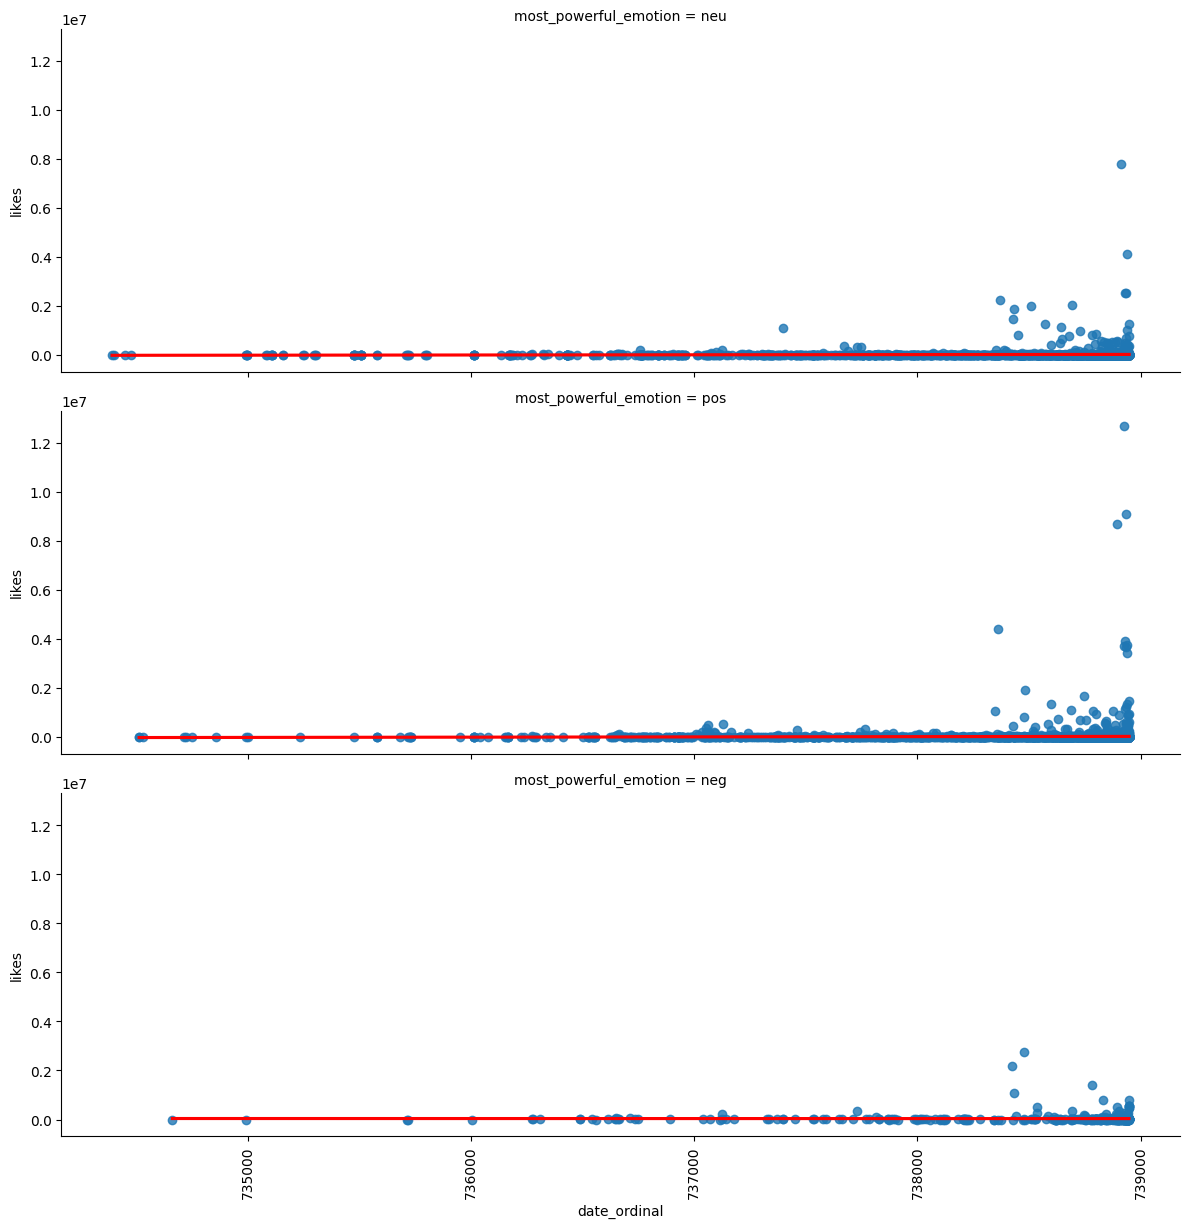

In [22]:
g = sns.FacetGrid(data=non_locational_data, row="most_powerful_emotion", height=4, aspect=3, )
g.map(sns.regplot, "date_ordinal", "likes", line_kws={"color": "red"})
plt.xticks(rotation=90)
plt.show()

Because before 2018 is a number of data points very low, so i don't look at this time interval, we focouse of 2020 to present

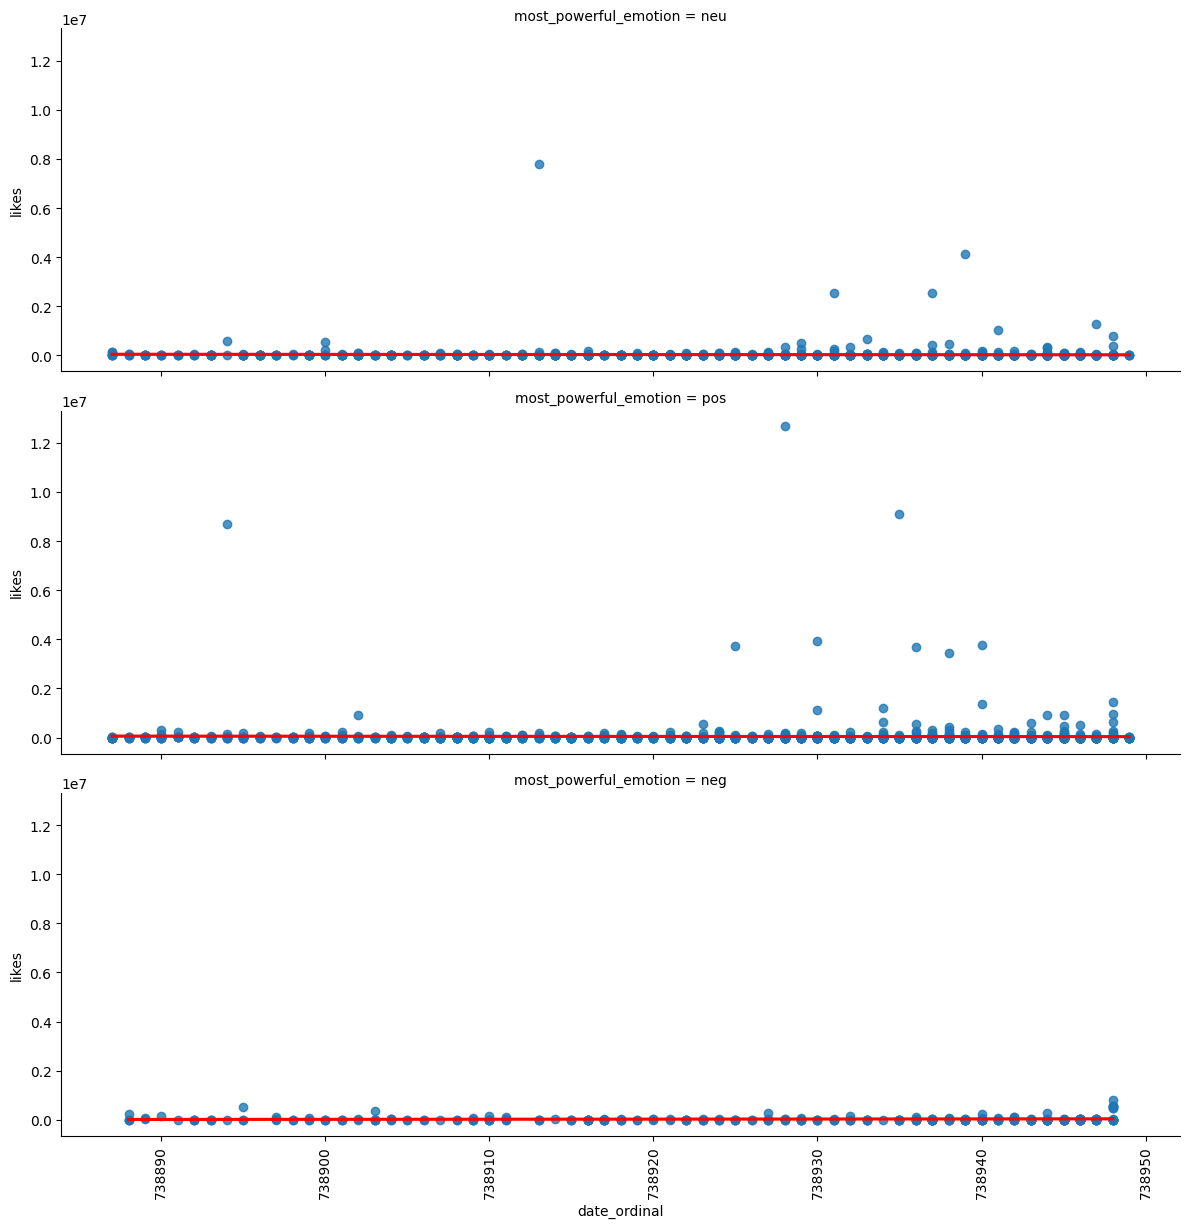

In [23]:
g = sns.FacetGrid(data=non_locational_data.loc[non_locational_data["date"] > '2024-01-01'], row="most_powerful_emotion", height=4, aspect=3,)
g.map(sns.regplot, "date_ordinal", "likes",line_kws={"color": "red"})
plt.xticks(rotation=90)
plt.show()

Effect of posts with 0 number of likes on slop of regression is very heavy, to have a good understand of public emotions we must look at post with high number of likes or comments, Based on my researches an ordinary instagram post get around 1300 likes and 25 comments are above average. so i want to look to posts that are seeing this condition.

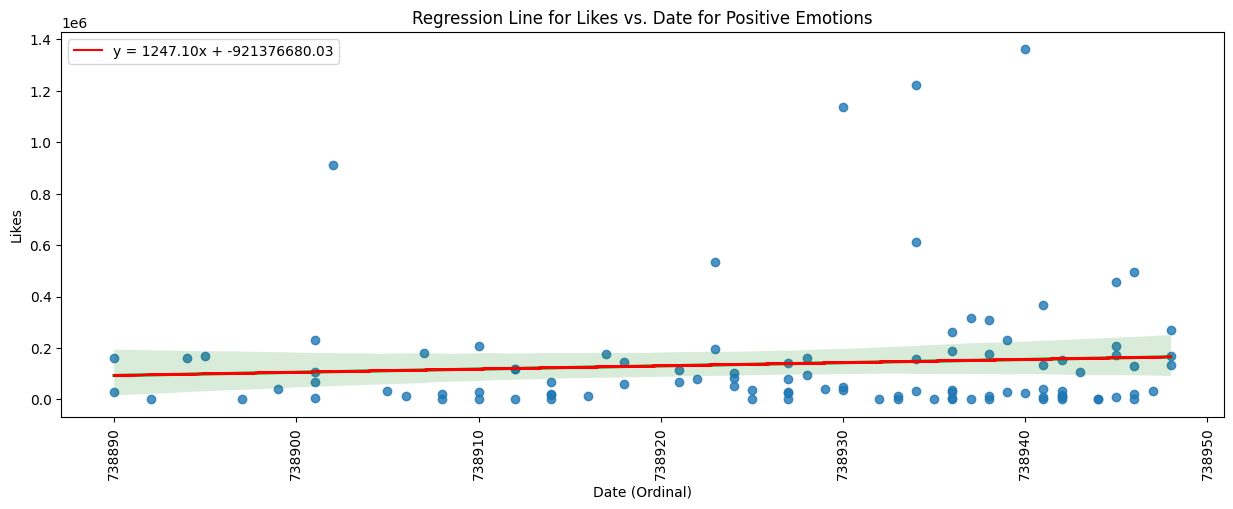

In [47]:
filtered_data = non_locational_data.loc[
    (non_locational_data["date"] > '2024-01-01') &
    (non_locational_data["engagement_rate(%)"] >= 3.5) & 
    (non_locational_data["most_powerful_emotion"] == "pos")
].copy()


plt.figure(figsize=(15, 5))
sns.regplot(data=filtered_data, x="date_ordinal", y="likes", line_kws={"color": "green"})
plt.xticks(rotation=90)

model = LinearRegression()
model.fit(filtered_data[["date_ordinal"]], filtered_data["likes"])

slope = model.coef_[0]
intercept = model.intercept_

plt.plot(filtered_data["date_ordinal"], model.predict(filtered_data[["date_ordinal"]]), color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('Date (Ordinal)')
plt.ylabel('Likes')
plt.title('Regression Line for Likes vs. Date for Positive Emotions')
plt.legend()
plt.show()

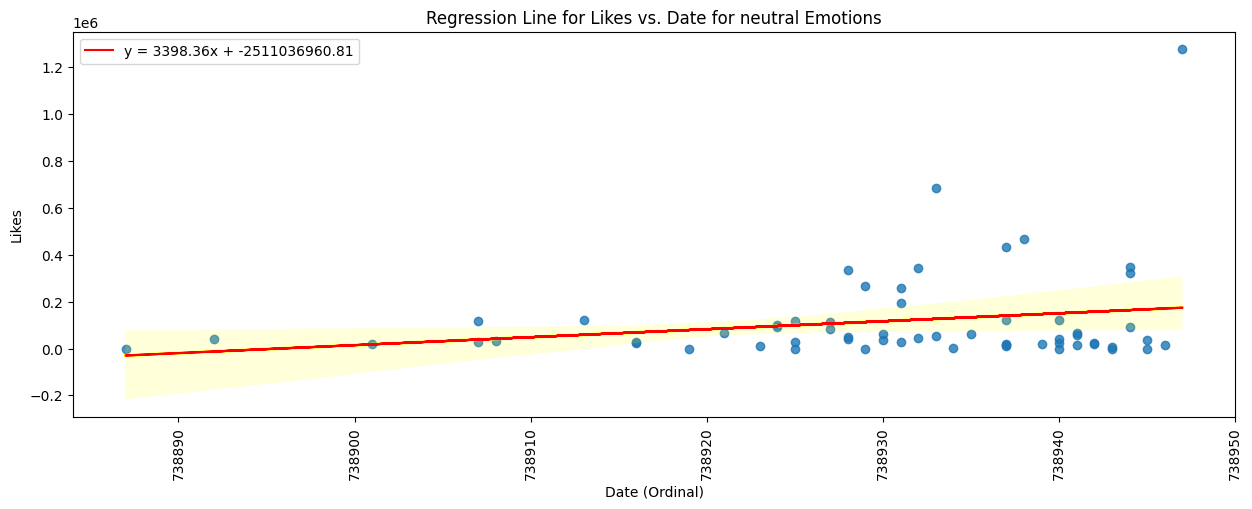

In [48]:
filtered_data = non_locational_data.loc[
    (non_locational_data["date"] > '2024-01-01') &
    (non_locational_data["engagement_rate(%)"] >= 3.5) & 
    (non_locational_data["most_powerful_emotion"] == "neu")
].copy()


plt.figure(figsize=(15, 5))
sns.regplot(data=filtered_data, x="date_ordinal", y="likes", line_kws={"color": "yellow"})
plt.xticks(rotation=90)

model = LinearRegression()
model.fit(filtered_data[["date_ordinal"]], filtered_data["likes"])

slope = model.coef_[0]
intercept = model.intercept_

plt.plot(filtered_data["date_ordinal"], model.predict(filtered_data[["date_ordinal"]]), color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('Date (Ordinal)')
plt.ylabel('Likes')
plt.title('Regression Line for Likes vs. Date for neutral Emotions')
plt.legend()
plt.show()

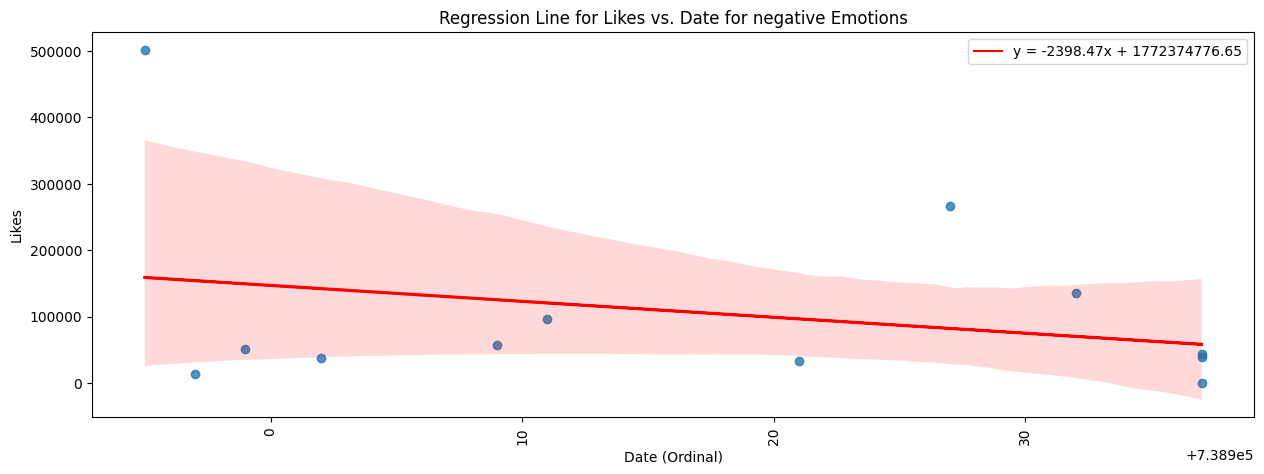

In [46]:
filtered_data = non_locational_data.loc[
    (non_locational_data["date"] > '2024-01-01') &
    (non_locational_data["engagement_rate(%)"] >= 3.5) & 
    (non_locational_data["most_powerful_emotion"] == "neg")
].copy()


plt.figure(figsize=(15, 5))
sns.regplot(data=filtered_data, x="date_ordinal", y="likes", line_kws={"color": "red"})
plt.xticks(rotation=90)

model = LinearRegression()
model.fit(filtered_data[["date_ordinal"]], filtered_data["likes"])

slope = model.coef_[0]
intercept = model.intercept_

plt.plot(filtered_data["date_ordinal"], model.predict(filtered_data[["date_ordinal"]]), color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('Date (Ordinal)')
plt.ylabel('Likes')
plt.title('Regression Line for Likes vs. Date for negative Emotions')
plt.legend()
plt.show()

----------

# Hashtag analysis

What are the most frequently employed hashtags? How do these hashtags manifest emotions, influenced by time?

In [76]:
hashtag_count = dict()
def hashtag(row):
    hashtag = ast.literal_eval(row["hashtag"])
    for hash in hashtag:

        if hash in hashtag_count:
            hashtag_count[f'{hash}'] += 1
        else:
            hashtag_count[f'{hash}'] = 1
    
non_locational_data.apply(hashtag, axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
6839    None
6840    None
6841    None
6842    None
6843    None
Length: 6844, dtype: object

In [78]:
print(hashtag_count)
max_key = max(hashtag_count, key=lambda k: hashtag_count[k])
print(hashtag_count[max_key])
max_key


{'browtips': 1, 'eyebrowtutorial': 2, 'browmakeup': 1, 'makeup': 34, 'makeuptips': 1, 'sigmaxchristendominique': 1, 'makeupforbeginners': 2, 'beginnermakeup': 1, 'makeuptutorial': 9, '90smakeup': 2, 'sbxambassador': 2, 'glammakeup': 1, 'pamelaanderson': 1, 'contour': 2, 'contourtutorial': 2, 'nofoundationmakeup': 1, 'nofoundation': 1, 'everydaymakeup': 1, 'browneyesmakeup': 1, 'TooFacedPartner': 1, 'cozypinkmakeup': 1, 'girlsnightin': 1, 'grwm': 9, 'girltalk': 1, 'valentinesmakeup': 1, 'makeuptutorials': 2, 'girlsintheir30s': 1, 'over30': 1, 'birthdaygirl': 2, 'hairtransformation': 1, 'haircolor': 4, 'transformation': 5, 'birdphotographymasterclass': 1, 'birdsofparadise': 1, 'hornbills': 1, 'birds': 3, 'masterclass': 1, 'birdphotography': 1, 'LiveForTheStory': 6, 'CanonAmbassador': 4, 'natureinfocus': 2, 'bonobo': 2, 'DRC': 2, 'CanonR5': 2, 'photojournalism': 19, 'canonambassador': 2, 'taillebourg': 1, 'artforsale': 1, 'artgallery': 1, 'liveforTheStory': 2, 'canonAmbassador': 1, 'canon

'love'

In [111]:
hashtag_count.pop('ad')
max_key = max(hashtag_count, key=lambda k: hashtag_count[k])
print(hashtag_count[max_key])
max_key


53


'nature'

#### most used hashtag is **`#love`** which used 79 times in whole *`non_locational`* dataset

## Hashtag Finder 

### #Love

In [100]:

columns = non_locational_data.columns.values.tolist()
certain_hashtag = pd.DataFrame(columns=columns)

def hashtag(row):
    hashtag = ast.literal_eval(row["hashtag"])
    love_list = ["LOVE", "Love", "LOve", "LOVe", "love"]
    for love in love_list:
        if (love in hashtag):
            certain_hashtag.loc[len(certain_hashtag)] = row
    
non_locational_data.apply(hashtag, axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
6839    None
6840    None
6841    None
6842    None
6843    None
Length: 6844, dtype: object

In [101]:
certain_hashtag.head(2)

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,imageUrl,multiple_images,...,followers,following,caption_emotions,most_powerful_emotion,emotion_score,engagement_rate(%),hashtag,date,time,date_ordinal
0,621649003,deemabayyaa,C207lmai_9H,True,With affection from Sweden 🇸🇪\n#deemabayyaa #s...,24,628,1706838471.0,https://instagram.fkiv3-1.fna.fbcdn.net/v/t51....,False,...,1755532.0,637.0,"{'neg': 0.06723274, 'neu': 0.31909016, 'pos': ...",pos,0.613677,0.03714,"['deemabayyaa', 'sweden', 'stockholm', 'love',...",2024-02-02 00:00:00,01:47:51,738918
1,2979242389,destinationwolf,Ceq2tTQOWQE,True,Reality of Little Venice vs Instagram 😅😅😅\n\nT...,18,708,1654960535.0,https://instagram.flhr13-1.fna.fbcdn.net/v/t51...,False,...,351168.0,1.0,"{'neg': 0.15532492, 'neu': 0.429469, 'pos': 0....",neu,0.429469,0.206739,"['italy', 'destinationwolf', 'tourists', 'trav...",2022-06-11 00:00:00,15:15:35,738317


In [102]:
# certain_hashtag['owner_id'] = certain_hashtag['owner_id'].astype(int)
certain_hashtag["likes"] = certain_hashtag['likes'].astype(int)
certain_hashtag["comments"] = certain_hashtag['comments'].astype(int)
certain_hashtag["created_at"] = certain_hashtag['created_at'].astype(float)
certain_hashtag["followers"] = certain_hashtag['followers'].astype(int)
certain_hashtag["following"] = certain_hashtag['following'].astype(int)
certain_hashtag["emotion_score"] = certain_hashtag['emotion_score'].astype(float)
certain_hashtag["engagement_rate(%)"] = certain_hashtag["engagement_rate(%)"].astype(float)
# certain_hashtag["date"] = certain_hashtag["date"].dt.date
# certain_hashtag['time'] = certain_hashtag["time"].dt.time
certain_hashtag["date_ordinal"] = certain_hashtag["date_ordinal"].astype(int)

### '#Love' sentimental analysis over time

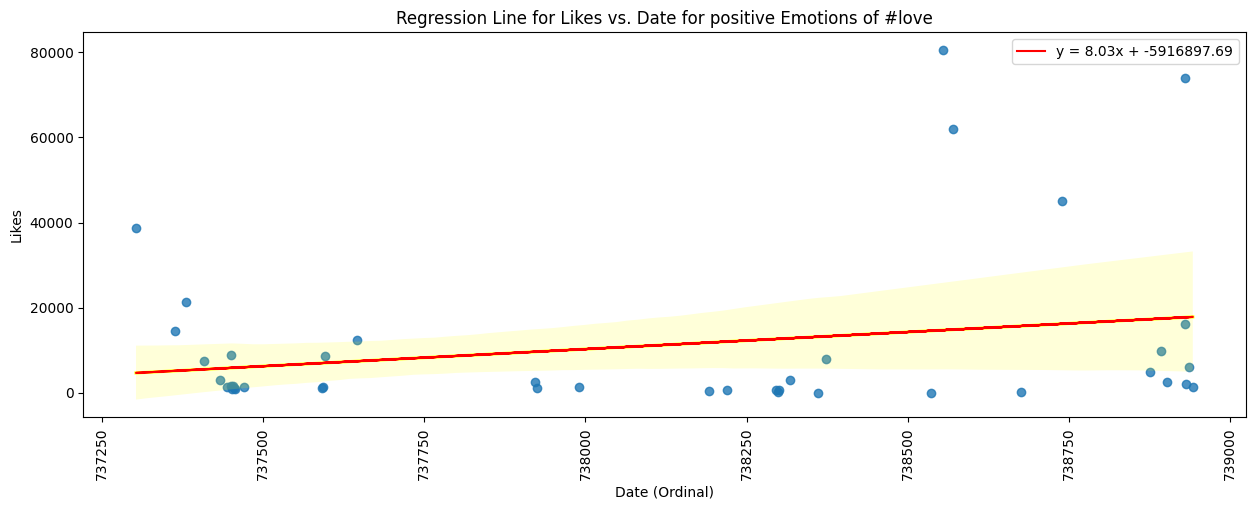

In [107]:
filtered_data = certain_hashtag.loc[
    (non_locational_data["most_powerful_emotion"] == "pos")
].copy()


plt.figure(figsize=(15, 5))
sns.regplot(data=filtered_data, x="date_ordinal", y="likes", line_kws={"color": "yellow"})
plt.xticks(rotation=90)

model = LinearRegression()
model.fit(filtered_data[["date_ordinal"]], filtered_data["likes"])

slope = model.coef_[0]
intercept = model.intercept_

plt.plot(filtered_data["date_ordinal"], model.predict(filtered_data[["date_ordinal"]]), color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('Date (Ordinal)')
plt.ylabel('Likes')
plt.title('Regression Line for Likes vs. Date for positive Emotions of #love')
plt.legend()
plt.show()

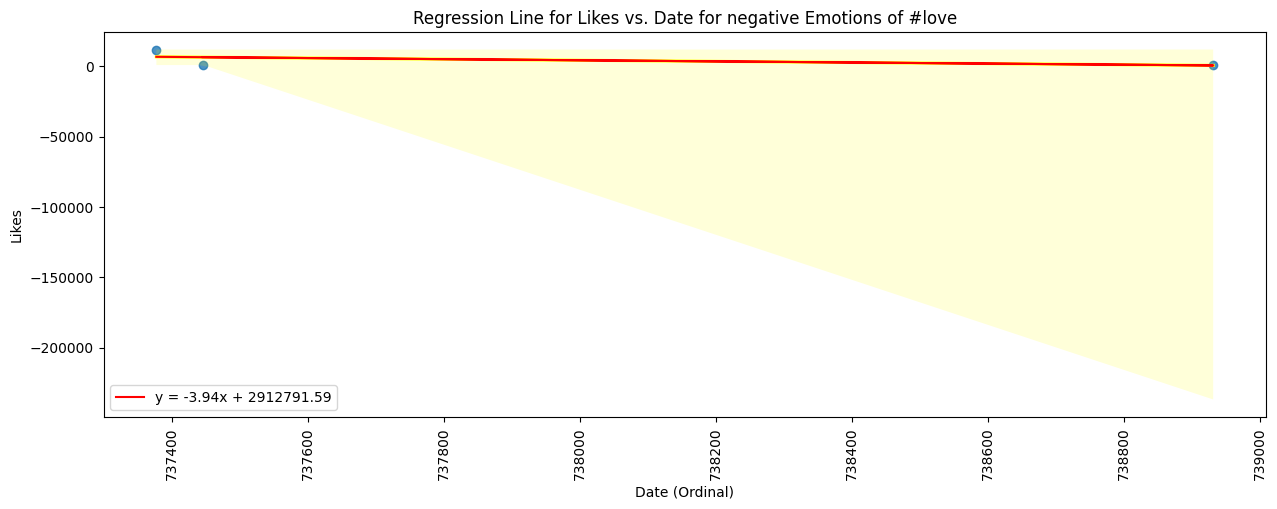

In [110]:
filtered_data = certain_hashtag.loc[
    (non_locational_data["most_powerful_emotion"] == "neg")
].copy()


plt.figure(figsize=(15, 5))
sns.regplot(data=filtered_data, x="date_ordinal", y="likes", line_kws={"color": "yellow"})
plt.xticks(rotation=90)

model = LinearRegression()
model.fit(filtered_data[["date_ordinal"]], filtered_data["likes"])

slope = model.coef_[0]
intercept = model.intercept_

plt.plot(filtered_data["date_ordinal"], model.predict(filtered_data[["date_ordinal"]]), color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('Date (Ordinal)')
plt.ylabel('Likes')
plt.title('Regression Line for Likes vs. Date for negative Emotions of #love')
plt.legend()
plt.show()

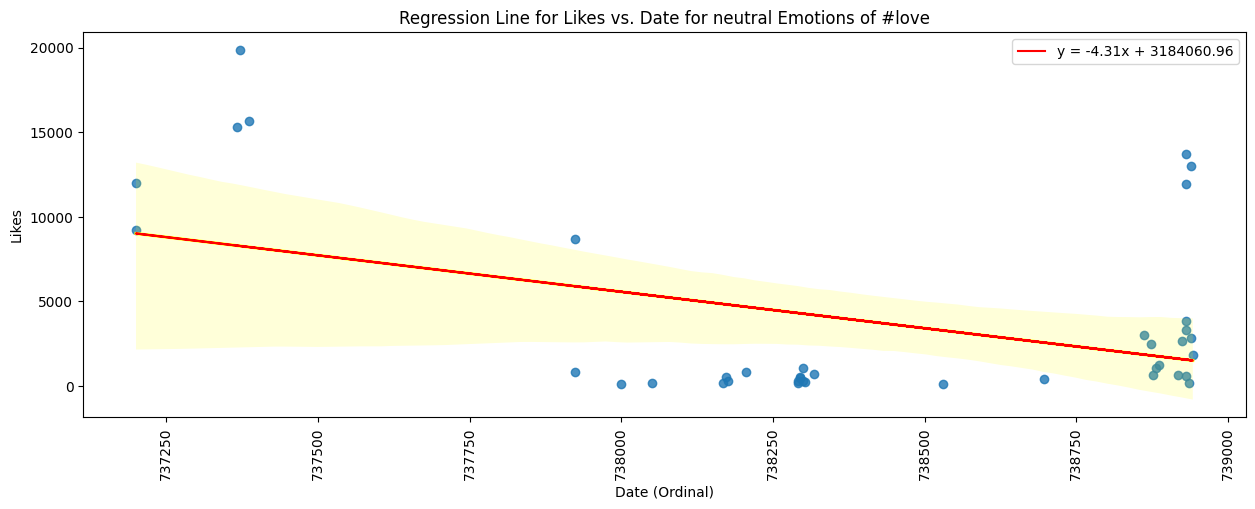

In [109]:
filtered_data = certain_hashtag.loc[
    (non_locational_data["most_powerful_emotion"] == "neu")
].copy()


plt.figure(figsize=(15, 5))
sns.regplot(data=filtered_data, x="date_ordinal", y="likes", line_kws={"color": "yellow"})
plt.xticks(rotation=90)

model = LinearRegression()
model.fit(filtered_data[["date_ordinal"]], filtered_data["likes"])

slope = model.coef_[0]
intercept = model.intercept_

plt.plot(filtered_data["date_ordinal"], model.predict(filtered_data[["date_ordinal"]]), color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('Date (Ordinal)')
plt.ylabel('Likes')
plt.title('Regression Line for Likes vs. Date for neutral Emotions of #love')
plt.legend()
plt.show()

since #love is not such good for seeing sentimental analysis of negative hashtags i want to analyze next top used hashtag in dataset: #AD with 56 times usage 


### #AD

In [112]:
columns = non_locational_data.columns.values.tolist()
certain_hashtag = pd.DataFrame(columns=columns)

def hashtag(row):
    hashtag = ast.literal_eval(row["hashtag"])
    love_list = ["Ad", "ad", "AD", "ADS", "ADs", "Ads", "ads"]
    for love in love_list:
        if (love in hashtag):
            certain_hashtag.loc[len(certain_hashtag)] = row
    
non_locational_data.apply(hashtag, axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
6839    None
6840    None
6841    None
6842    None
6843    None
Length: 6844, dtype: object

In [113]:
# certain_hashtag['owner_id'] = certain_hashtag['owner_id'].astype(int)
certain_hashtag["likes"] = certain_hashtag['likes'].astype(int)
certain_hashtag["comments"] = certain_hashtag['comments'].astype(int)
certain_hashtag["created_at"] = certain_hashtag['created_at'].astype(float)
certain_hashtag["followers"] = certain_hashtag['followers'].astype(int)
certain_hashtag["following"] = certain_hashtag['following'].astype(int)
certain_hashtag["emotion_score"] = certain_hashtag['emotion_score'].astype(float)
certain_hashtag["engagement_rate(%)"] = certain_hashtag["engagement_rate(%)"].astype(float)
# certain_hashtag["date"] = certain_hashtag["date"].dt.date
# certain_hashtag['time'] = certain_hashtag["time"].dt.time
certain_hashtag["date_ordinal"] = certain_hashtag["date_ordinal"].astype(int)

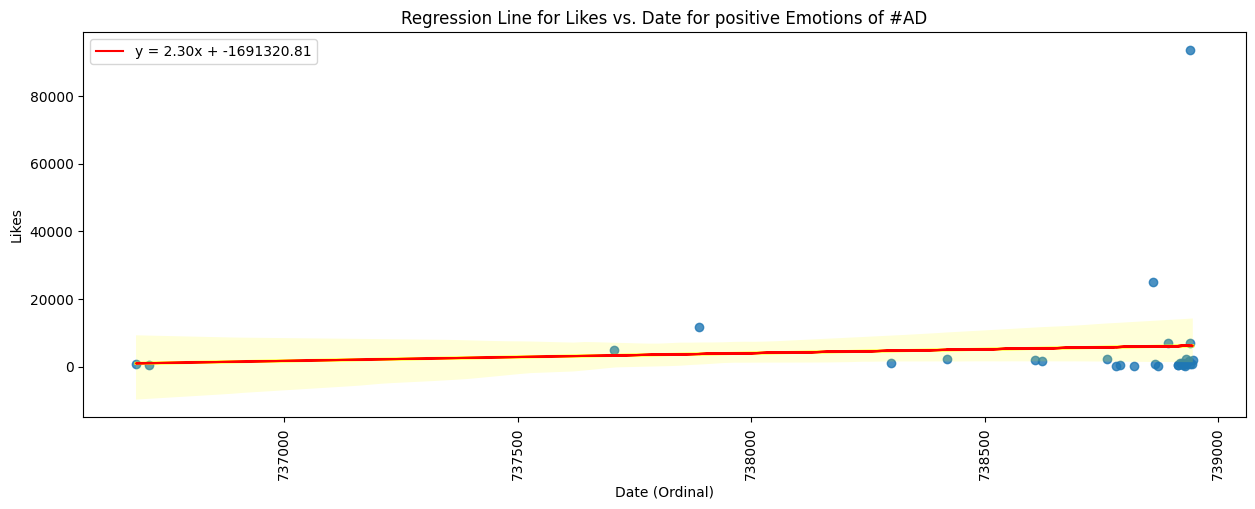

In [114]:
filtered_data = certain_hashtag.loc[
    (non_locational_data["most_powerful_emotion"] == "pos")
].copy()


plt.figure(figsize=(15, 5))
sns.regplot(data=filtered_data, x="date_ordinal", y="likes", line_kws={"color": "yellow"})
plt.xticks(rotation=90)

model = LinearRegression()
model.fit(filtered_data[["date_ordinal"]], filtered_data["likes"])

slope = model.coef_[0]
intercept = model.intercept_

plt.plot(filtered_data["date_ordinal"], model.predict(filtered_data[["date_ordinal"]]), color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('Date (Ordinal)')
plt.ylabel('Likes')
plt.title('Regression Line for Likes vs. Date for positive Emotions of #AD')
plt.legend()
plt.show()

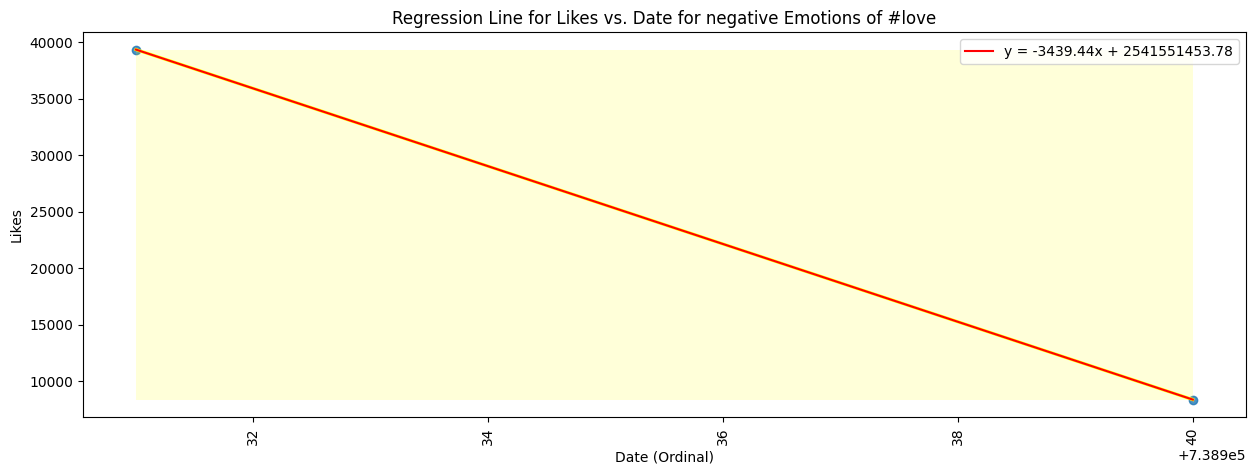

In [115]:
filtered_data = certain_hashtag.loc[
    (non_locational_data["most_powerful_emotion"] == "neg")
].copy()


plt.figure(figsize=(15, 5))
sns.regplot(data=filtered_data, x="date_ordinal", y="likes", line_kws={"color": "yellow"})
plt.xticks(rotation=90)

model = LinearRegression()
model.fit(filtered_data[["date_ordinal"]], filtered_data["likes"])

slope = model.coef_[0]
intercept = model.intercept_

plt.plot(filtered_data["date_ordinal"], model.predict(filtered_data[["date_ordinal"]]), color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('Date (Ordinal)')
plt.ylabel('Likes')
plt.title('Regression Line for Likes vs. Date for negative Emotions of #love')
plt.legend()
plt.show()

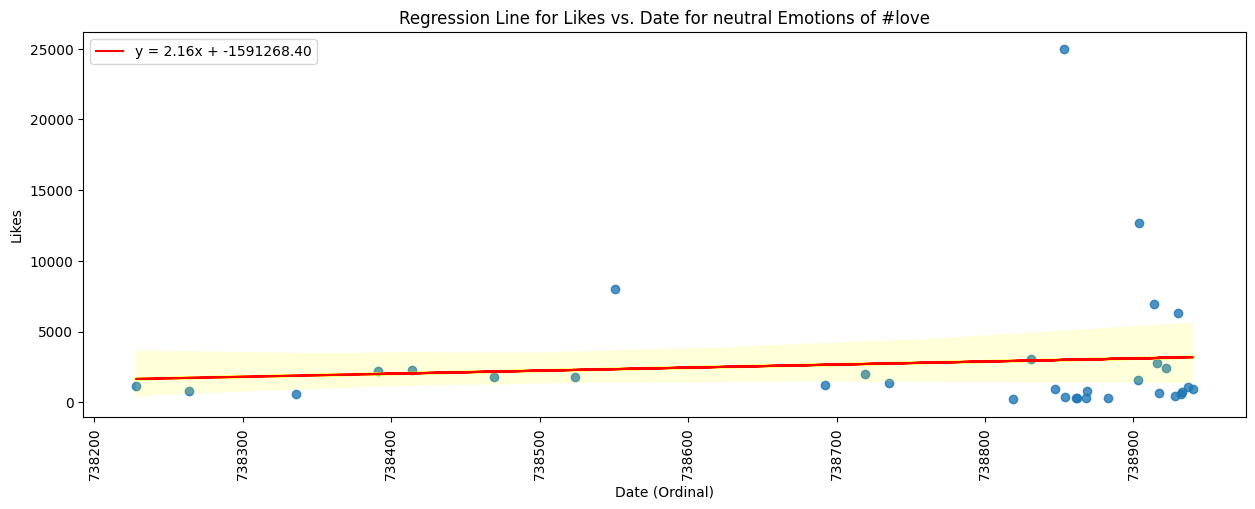

In [116]:
filtered_data = certain_hashtag.loc[
    (non_locational_data["most_powerful_emotion"] == "neu")
].copy()


plt.figure(figsize=(15, 5))
sns.regplot(data=filtered_data, x="date_ordinal", y="likes", line_kws={"color": "yellow"})
plt.xticks(rotation=90)

model = LinearRegression()
model.fit(filtered_data[["date_ordinal"]], filtered_data["likes"])

slope = model.coef_[0]
intercept = model.intercept_

plt.plot(filtered_data["date_ordinal"], model.predict(filtered_data[["date_ordinal"]]), color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('Date (Ordinal)')
plt.ylabel('Likes')
plt.title('Regression Line for Likes vs. Date for neutral Emotions of #love')
plt.legend()
plt.show()